安装FoolBox

    pip install foolbox==1.7.0


In [1]:
# if you use Jupyter notebooks
%matplotlib inline
import foolbox
import keras
import numpy as np
from keras.applications.resnet50 import ResNet50

Using TensorFlow backend.


In [2]:
# instantiate model
keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

# get source image and label
image, label = foolbox.utils.imagenet_example()

# 因为Keras ResNet50 使用 BGR 而不是默认的 RGB
pred = fmodel.predictions(image[:, :, ::-1])
print("label={}".format(np.argmax(pred)))


label=282


In [3]:
#无定向攻击
#attack = foolbox.attacks.FGSM(fmodel)
attack = foolbox.attacks.CarliniWagnerL2Attack(fmodel)

# 因为Keras ResNet50 使用 BGR 而不是默认的 RGB
adversarial = attack(image[:, :, ::-1],label)

if adversarial is None:
    print("Fail to adversarial")
else:
    pred = fmodel.predictions(adversarial)
    print("label={}".format(np.argmax(pred)))

label=281


Image Size 150528 Shape (1, 224, 224, 3)
Noise L_0 norm: 150461 99%
Noise L_2 norm: 0.02572029083967209 1%
Noise L_inf norm: 0.0007488429546356201 1%


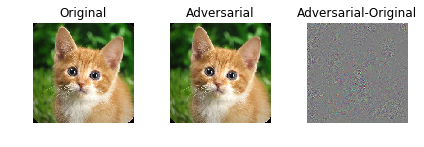

(99, 1, 1)

In [4]:
from tools import show_d

show_d(np.expand_dims(image,axis=0)/256.0,np.expand_dims(adversarial[:, :, ::-1],axis=0)/256.0)

In [5]:
from foolbox.criteria import TargetClassProbability

#定向攻击标签值为22
target = TargetClassProbability(22,p=0.5)
#定向攻击
#attack = foolbox.attacks.FGSM(fmodel,criterion=target)
attack = foolbox.attacks.CarliniWagnerL2Attack(fmodel,criterion=target)

# 因为Keras ResNet50 使用 BGR 而不是默认的 RGB
adversarial = attack(image[:, :, ::-1],label)

if adversarial is None:
    print("Fail to adversarial")
else:
    pred = fmodel.predictions(adversarial)
    print("label={}".format(np.argmax(pred)))

label=22


Image Size 150528 Shape (1, 224, 224, 3)
Noise L_0 norm: 150526 99%
Noise L_2 norm: 1.0592668056488037 1%
Noise L_inf norm: 0.035319000482559204 1%


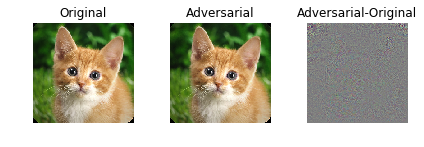

(99, 1, 1)

In [6]:
show_d(np.expand_dims(image,axis=0)/256.0,np.expand_dims(adversarial[:, :, ::-1],axis=0)/256.0)